# Questions 2 & 3: Is there a relationship between success(ratings) of a movie and the director and/or budget? How about between success in terms of money and the director and/or budget?

Data exploration

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

sns.set()

In [2]:
# Import csv files
movies = pd.read_csv('Original Data/IMDb_movies.csv')
actors = pd.read_csv('Original Data/IMDb_names.csv')
ratings = pd.read_csv('Original Data/IMDb_ratings.csv')
title_principals = pd.read_csv('Original Data/IMDb_title_principals.csv')

In [3]:
movies = pd.DataFrame(movies)
actors = pd.DataFrame(actors)
ratings = pd.DataFrame(ratings)
title_principals = pd.DataFrame(title_principals)

In [4]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [5]:
ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

Cleaning Data

In [6]:
movies = pd.merge(movies,ratings[['imdb_title_id','us_voters_rating']],on='imdb_title_id',how='left')
movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,us_voters_rating
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0,6.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0,6.2
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0,5.5
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0,7.1
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,"Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN,5.0
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,"Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Delete columns that we don't need, drop all NaN and reset index
movies = movies.drop(['reviews_from_users','reviews_from_critics','original_title','duration','description'],axis=1)
movies = movies.dropna(how='any')

# Delete budget and gross income in other currencies
movies = movies[~movies['budget'].str.match(r'([A-Z]+)')]
movies = movies[~movies['usa_gross_income'].str.match(r'($[A-Z]+\w)')]
movies = movies[~movies['worlwide_gross_income'].str.match(r'($[A-Z]+\w)')]

# Delete '$' symbol from table
movies['budget'] = movies['budget'].str.replace('$','')
movies['usa_gross_income'] = movies['usa_gross_income'].str.replace('$','')
movies['worlwide_gross_income'] = movies['worlwide_gross_income'].str.replace('$','')

movies = movies.reset_index(drop=True)

movies.head()

,imdb_title_id,title,year,date_published,genre,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,us_voters_rating
0,tt0021749,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.5,152716,1500000,19181,32609,99.0,8.5
1,tt0027977,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.5,197969,1500000,163577,445226,96.0,8.5
2,tt0029583,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",7.6,168735,1499000,184925486,184925486,95.0,7.7
3,tt0031381,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,269664,3977000,200852579,402352579,97.0,8.2
4,tt0031679,Mr. Smith Goes to Washington,1939,1940-05-03,"Comedy, Drama",USA,English,Frank Capra,"Sidney Buchman, Lewis R. Foster",Columbia Pictures,"Jean Arthur, James Stewart, Claude Rains, Edwa...",8.1,100206,1900000,144738,144738,73.0,8.3


In [8]:
# Convert budget and gross income to number
movies['budget'] = pd.to_numeric(movies['budget'])
movies['usa_gross_income'] = pd.to_numeric(movies['usa_gross_income'])
movies['worlwide_gross_income'] = pd.to_numeric(movies['worlwide_gross_income'])

# Transform values to thousands
movies['budget'] = movies['budget']/100
movies['usa_gross_income'] = movies['usa_gross_income']/100
movies['worlwide_gross_income'] = movies['worlwide_gross_income']/100

In [9]:
# Create revenues from income minus budget
revenue_us = movies['usa_gross_income'] - movies['budget']
revenue_ww = movies['worlwide_gross_income'] - movies['budget']

# Add values to dataframe
movies['revenue_usa'] = revenue_us
movies['revenue_worlwide'] = revenue_ww

# Display preview of new columns
movies[['title','budget','usa_gross_income','worlwide_gross_income','revenue_usa','revenue_worlwide']]

,title,budget,usa_gross_income,worlwide_gross_income,revenue_usa,revenue_worlwide
0,City Lights,15000.0,191.81,326.09,-14808.19,-14673.91
1,Modern Times,15000.0,1635.77,4452.26,-13364.23,-10547.74
2,Snow White and the Seven Dwarfs,14990.0,1849254.86,1849254.86,1834264.86,1834264.86
3,Gone with the Wind,39770.0,2008525.79,4023525.79,1968755.79,3983755.79
4,Mr. Smith Goes to Washington,19000.0,1447.38,1447.38,-17552.62,-17552.62
...,...,...,...,...,...,...
5909,Midsommar,100000.0,274263.61,411237.70,174263.61,311237.70
5910,Unplanned,60000.0,190051.09,193204.81,130051.09,133204.81
5911,Cold Blood Legacy,27000.0,50.83,10098.88,-26949.17,-16901.12
5912,Playing with Fire,299000.0,188478.24,217887.46,-110521.76,-81112.54


# Summary stats with deleted outliers

In [10]:
# All outliers to analize
budget = movies['budget']
budget_quartiles = budget.quantile([.25,.5,.75])
budget_lowerq = budget_quartiles[0.25]
budget_upperq = budget_quartiles[0.75]
budget_iqr = budget_upperq - budget_lowerq
budget_lower_bound = budget_lowerq - (1.5 * budget_iqr)
budget_upper_bound = budget_upperq + (1.5 * budget_iqr)

# usrevenue = movies['revenue_usa']
# usrevenue_quartiles = usrevenue.quantile([.25,.5,.75])
# usrevenue_lowerq = usrevenue_quartiles[0.25]
# usrevenue_upperq = usrevenue_quartiles[0.75]
# usrevenue_iqr = usrevenue_upperq - usrevenue_lowerq
# usrevenue_lower_bound = usrevenue_lowerq - (1.5 * usrevenue_iqr)
# usrevenue_upper_bound = usrevenue_upperq + (1.5 * usrevenue_iqr)

# wwrevenue = movies['revenue_worlwide']
# wwrevenue_quartiles = wwrevenue.quantile([.25,.5,.75])
# wwrevenue_lowerq = wwrevenue_quartiles[0.25]
# wwrevenue_upperq = wwrevenue_quartiles[0.75]
# wwrevenue_iqr = wwrevenue_upperq - wwrevenue_lowerq
# wwrevenue_lower_bound = wwrevenue_lowerq - (1.5 * wwrevenue_iqr)
# wwrevenue_upper_bound = wwrevenue_upperq + (1.5 * wwrevenue_iqr)

# usratings = movies['us_voters_rating']
# usratings_quartiles = usratings.quantile([.25,.5,.75])
# usratings_lowerq = usratings_quartiles[0.25]
# usratings_upperq = usratings_quartiles[0.75]
# usratings_iqr = usratings_upperq - usratings_lowerq
# usratings_lower_bound = usratings_lowerq - (1.5 * usratings_iqr)
# usratings_upper_bound = usratings_upperq + (1.5 * usratings_iqr)

# wwratings = movies['avg_vote']
# wwratings_quartiles = wwratings.quantile([.25,.5,.75])
# wwratings_lowerq = wwratings_quartiles[0.25]
# wwratings_upperq = wwratings_quartiles[0.75]
# wwratings_iqr = wwratings_upperq - wwratings_lowerq
# wwratings_lower_bound = wwratings_lowerq - (1.5 * wwratings_iqr)
# wwratings_upper_bound = wwratings_upperq + (1.5 * wwratings_iqr)

# Only deleted budget outliers
movies2 = movies.loc[budget_lower_bound < movies['budget']]
print(movies2.shape)
movies2 = movies2.loc[movies['budget'] < budget_upper_bound]
  
#    ( (usrevenue_lower_bound < movies['revenue_usa']) | (movies['revenue_usa'] < usrevenue_upper_bound) ) &
#    ( (wwrevenue_lower_bound < movies['revenue_worlwide']) | (movies['revenue_worlwide'] < wwrevenue_upper_bound) ) &   ( (usratings_lower_bound < movies['us_voters_rating']) | (movies['us_voters_rating'] < usratings_upper_bound) ) &   ( (wwratings_lower_bound < movies['avg_vote']) | (movies['avg_vote'] < wwratings_upper_bound) )

print(movies2.shape)

(5914, 20)
(5400, 20)


In [11]:
# General information of database
director_movies = movies2['director'].value_counts()
max_movie = director_movies.max()

# Number of directors
directors = len(movies2['director'].unique())

# Range of years
max_year = movies2['year'].max()
min_year = movies2['year'].min()

# Range of budget
min_budget = movies2['budget'].min()
max_budget = movies2['budget'].max()

print(f'There are {directors} directors, from {min_year} to {max_year}, budget ranges from {min_budget} to {max_budget}, the maximum movies by a director is {max_movie}')

There are 2542 directors, from 1931 to 2019, budget ranges from 0.2 to 880000.0, the maximum movies by a director is 33


In [12]:
# Stats information grouped by director
director_sum = movies2.groupby('director').sum()
director_mean = movies2.groupby('director').mean()
director_median = movies2.groupby('director').median()
director_var = movies2.groupby('director').var()
director_sem = movies2.groupby('director').sem()

## Plots of general information

The correlation between the average budget and the average revenue in US is 0.1


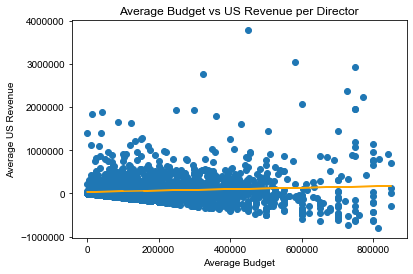

In [13]:
# Budget vs US revenue
plt.scatter(director_mean['budget'],director_mean['revenue_usa'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['revenue_usa'])[0],2)
print(f"The correlation between the average budget and the average revenue in US is {corr}")
model = st.linregress(director_mean['budget'],director_mean['revenue_usa'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average US Revenue')
plt.title('Average Budget vs US Revenue per Director')
plt.savefig("Images/budget vs us_revenue.png")
plt.show()

The correlation between the average budget and the average revenue Worldwide is 0.4


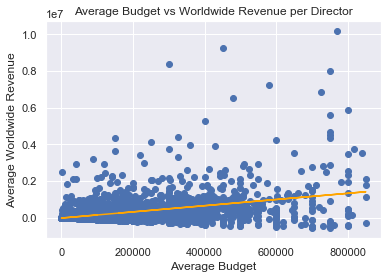

In [14]:
# Budget vs Worldwide revenue
plt.scatter(director_mean['budget'],director_mean['revenue_worlwide'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['revenue_worlwide'])[0],2)
print(f"The correlation between the average budget and the average revenue Worldwide is {corr}")
model = st.linregress(director_mean['budget'],director_mean['revenue_worlwide'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average Worldwide Revenue')
plt.title('Average Budget vs Worldwide Revenue per Director')
plt.savefig("Images/budget vs ww_revenue.png")
plt.show()

The correlation between the average budget and the average ratings in US is -0.02


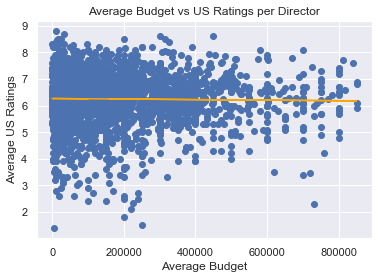

In [15]:
# Budget vs US ratings
plt.scatter(director_mean['budget'],director_mean['us_voters_rating'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['us_voters_rating'])[0],2)
print(f"The correlation between the average budget and the average ratings in US is {corr}")
model = st.linregress(director_mean['budget'],director_mean['us_voters_rating'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average US Ratings')
plt.title('Average Budget vs US Ratings per Director')
plt.savefig("Images/budget vs us_ratings.png")
plt.show()

The correlation between the average budget and the average ratings Worldwide is 0.02


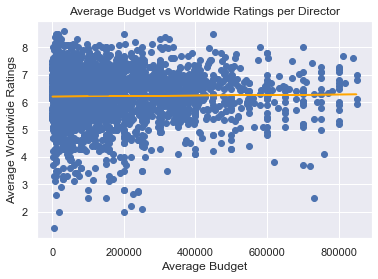

In [16]:
# WW budget vs ratings
plt.scatter(director_mean['budget'],director_mean['avg_vote'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['avg_vote'])[0],2)
print(f"The correlation between the average budget and the average ratings Worldwide is {corr}")
model = st.linregress(director_mean['budget'],director_mean['avg_vote'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average Worldwide Ratings')
plt.title('Average Budget vs Worldwide Ratings per Director')
plt.savefig("Images/budget vs ww_ratings.png")
plt.show()

# Summary stats of last decade with deleted outliers of original database

In [17]:
# Filter years above 2009
recent_movies = movies.loc[movies['year']>2009]

In [18]:
# Budget outliers
budget = recent_movies['budget']
budget_quartiles = budget.quantile([.25,.5,.75])
budget_lowerq = budget_quartiles[0.25]
budget_upperq = budget_quartiles[0.75]
budget_iqr = budget_upperq - budget_lowerq
budget_lower_bound = budget_lowerq - (1.5 * budget_iqr)
budget_upper_bound = budget_upperq + (1.5 * budget_iqr)

print(recent_movies.shape)

# Delet outliers
recent_movies = recent_movies.loc[budget_lower_bound < recent_movies['budget']]
print(recent_movies.shape)

recent_movies = recent_movies.loc[recent_movies['budget'] < budget_upper_bound]
print(recent_movies.shape)

(1953, 20)
(1953, 20)
(1752, 20)


In [19]:
# General information of database
recent_director_movies = recent_movies['director'].value_counts()
recent_max_movie = recent_director_movies.max()

# Number of directors
recent_directors = len(recent_movies['director'].unique())

# Range of years
recent_max_year = recent_movies['year'].max()
recent_min_year = recent_movies['year'].min()

# Range of budget
recent_min_budget = recent_movies['budget'].min()
recent_max_budget = recent_movies['budget'].max()

print(f'There are {recent_directors} directors, from {recent_min_year} to {recent_max_year}, budget ranges from {recent_min_budget} to {recent_max_budget}, the maximum movies by a director is {recent_max_movie}')

recent_movies.shape

There are 1188 directors, from 2010 to 2019, budget ranges from 120.0 to 1120000.0, the maximum movies by a director is 11


(1752, 20)

In [20]:
# Stats information by director in the last decade
recent_director_sum = recent_movies.groupby('director').sum()
recent_director_mean = recent_movies.groupby('director').mean()
recent_director_median = recent_movies.groupby('director').median()
recent_director_var = recent_movies.groupby('director').var()
recent_director_sem = recent_movies.groupby('director').sem()

The correlation between the average budget and the average revenue in US in the last decade is 0.05


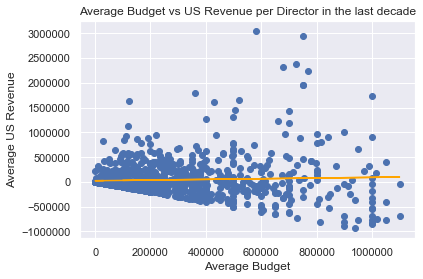

In [21]:
# Budget vs US revenue
plt.scatter(recent_director_mean['budget'],recent_director_mean['revenue_usa'])
corr=round(st.pearsonr(recent_director_mean['budget'],recent_director_mean['revenue_usa'])[0],2)
print(f"The correlation between the average budget and the average revenue in US in the last decade is {corr}")
model = st.linregress(recent_director_mean['budget'],recent_director_mean['revenue_usa'])
y_values = recent_director_mean['budget']*model[0]+model[1]
plt.plot(recent_director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average US Revenue')
plt.title('Average Budget vs US Revenue per Director in the last decade')
plt.savefig("Images/budget vs us_revenue in ld.png")
plt.show()

The correlation between the average budget and the average revenue Worldwide in the last decade is 0.48


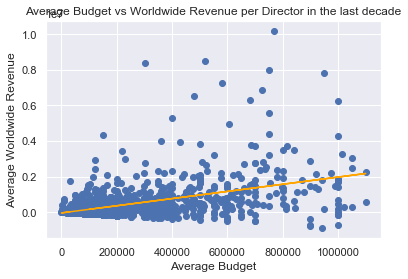

In [22]:
# Budget vs Worldwide revenue
plt.scatter(recent_director_mean['budget'],recent_director_mean['revenue_worlwide'])
corr=round(st.pearsonr(recent_director_mean['budget'],recent_director_mean['revenue_worlwide'])[0],2)
print(f"The correlation between the average budget and the average revenue Worldwide in the last decade is {corr}")
model = st.linregress(recent_director_mean['budget'],recent_director_mean['revenue_worlwide'])
y_values = recent_director_mean['budget']*model[0]+model[1]
plt.plot(recent_director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average Worldwide Revenue')
plt.title('Average Budget vs Worldwide Revenue per Director in the last decade')
plt.savefig("Images/budget vs ww_revenue in ld.png")
plt.show()

The correlation between the average budget and the average ratings in US in the last decade is 0.06


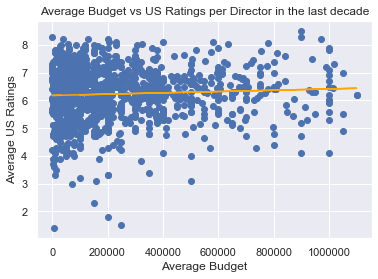

In [23]:
# Budget vs US ratings
plt.scatter(recent_director_mean['budget'],recent_director_mean['us_voters_rating'])
corr=round(st.pearsonr(recent_director_mean['budget'],recent_director_mean['us_voters_rating'])[0],2)
print(f"The correlation between the average budget and the average ratings in US in the last decade is {corr}")
model = st.linregress(recent_director_mean['budget'],recent_director_mean['us_voters_rating'])
y_values = recent_director_mean['budget']*model[0]+model[1]
plt.plot(recent_director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average US Ratings')
plt.title('Average Budget vs US Ratings per Director in the last decade')
plt.savefig("Images/budget vs us_ratings in ld.png")
plt.show()

The correlation between the average budget and the average ratings Worldwide in the last decade is 0.1


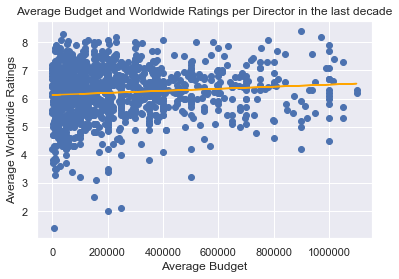

In [24]:
# Budget vs WW ratings
plt.scatter(recent_director_mean['budget'],recent_director_mean['avg_vote'])
corr=round(st.pearsonr(recent_director_mean['budget'],recent_director_mean['avg_vote'])[0],2)
print(f"The correlation between the average budget and the average ratings Worldwide in the last decade is {corr}")
model = st.linregress(recent_director_mean['budget'],recent_director_mean['avg_vote'])
y_values = recent_director_mean['budget']*model[0]+model[1]
plt.plot(recent_director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average Worldwide Ratings')
plt.title('Average Budget and Worldwide Ratings per Director in the last decade')
plt.savefig("Images/budget vs ww_ratings in ld.png")
plt.show()

# Top movies in US and top movies Worldwide

In [25]:
top15_usmovies = movies.nlargest(15,['revenue_usa'])
top15_wwmovies = movies.nlargest(15,['revenue_worlwide'])

In [26]:
top15_usmovies

,imdb_title_id,title,year,date_published,genre,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,us_voters_rating,revenue_usa,revenue_worlwide
5252,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,2015-12-17,"Action, Adventure, Sci-Fi",USA,English,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams",Lucasfilm,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,800030,2450000.0,9366622.25,20682236.24,81.0,8.1,6916622.25,18232236.24
3549,tt0499549,Avatar,2009,2009-12-17,"Action, Adventure, Fantasy",USA,"English, Spanish",James Cameron,James Cameron,Twentieth Century Fox,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1066602,2370000.0,7605076.25,27899683.01,83.0,7.7,5235076.25,25529683.01
5579,tt4154796,Avengers: Endgame,2019,2019-04-25,"Action, Adventure, Drama",USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely",Marvel Studios,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",8.5,602792,3560000.0,8583730.00,27978005.64,78.0,8.6,5023730.00,24418005.64
2811,tt0369610,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",USA,English,Colin Trevorrow,"Rick Jaffa, Amanda Silver",Universal Pictures,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,550189,1500000.0,6522706.25,16704006.37,59.0,7.1,5022706.25,15204006.37
4869,tt1825683,Black Panther,2018,2018-02-13,"Action, Adventure, Sci-Fi",USA,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler,"Ryan Coogler, Joe Robert Cole",Marvel Studios,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",7.3,551245,2000000.0,7000595.66,13469131.61,88.0,7.6,5000595.66,11469131.61
1444,tt0120338,Titanic,1997,1998-01-23,"Drama, Romance",USA,"English, Swedish, Italian",James Cameron,James Cameron,Twentieth Century Fox,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",7.8,980680,2000000.0,6593639.44,21874639.44,75.0,7.7,4593639.44,19874639.44
178,tt0076759,Star Wars,1977,1977-12-27,"Action, Adventure, Fantasy",USA,English,George Lucas,George Lucas,Lucasfilm,"Mark Hamill, Harrison Ford, Carrie Fisher, Pet...",8.6,1147198,110000.0,4609985.07,7755120.64,90.0,8.9,4499985.07,7645120.64
328,tt0083866,E.T. the Extra-Terrestrial,1982,1982-12-10,"Family, Sci-Fi",USA,English,Steven Spielberg,Melissa Mathison,Universal Pictures,"Dee Wallace, Henry Thomas, Peter Coyote, Rober...",7.8,345115,105000.0,4351105.54,7929105.54,91.0,8.0,4246105.54,7824105.54
5494,tt3606756,Incredibles 2,2018,2018-07-13,"Animation, Action, Adventure",USA,English,Brad Bird,Brad Bird,Walt Disney Pictures,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",7.7,219133,2000000.0,6085817.44,12428053.59,80.0,7.8,4085817.44,10428053.59
3735,tt0848228,The Avengers,2012,2012-04-26,"Action, Adventure, Sci-Fi",USA,"English, Russian, Hindi",Joss Whedon,"Joss Whedon, Zak Penn",Marvel Studios,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",8.0,1206904,2200000.0,6233579.10,15188129.88,69.0,8.3,4033579.10,12988129.88


In [27]:
top15_wwmovies

,imdb_title_id,title,year,date_published,genre,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,us_voters_rating,revenue_usa,revenue_worlwide
3549,tt0499549,Avatar,2009,2009-12-17,"Action, Adventure, Fantasy",USA,"English, Spanish",James Cameron,James Cameron,Twentieth Century Fox,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1066602,2370000.0,7605076.25,27899683.01,83.0,7.7,5235076.25,25529683.01
5579,tt4154796,Avengers: Endgame,2019,2019-04-25,"Action, Adventure, Drama",USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely",Marvel Studios,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",8.5,602792,3560000.0,8583730.00,27978005.64,78.0,8.6,5023730.00,24418005.64
1444,tt0120338,Titanic,1997,1998-01-23,"Drama, Romance",USA,"English, Swedish, Italian",James Cameron,James Cameron,Twentieth Century Fox,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",7.8,980680,2000000.0,6593639.44,21874639.44,75.0,7.7,4593639.44,19874639.44
5252,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,2015-12-17,"Action, Adventure, Sci-Fi",USA,English,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams",Lucasfilm,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,800030,2450000.0,9366622.25,20682236.24,81.0,8.1,6916622.25,18232236.24
5578,tt4154756,Avengers: Infinity War,2018,2018-04-26,"Action, Adventure, Sci-Fi",USA,English,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely",Marvel Studios,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.5,725138,3210000.0,6788154.82,20483597.54,68.0,8.5,3578154.82,17273597.54
2811,tt0369610,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",USA,English,Colin Trevorrow,"Rick Jaffa, Amanda Silver",Universal Pictures,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,550189,1500000.0,6522706.25,16704006.37,59.0,7.1,5022706.25,15204006.37
5794,tt6105098,The Lion King,2019,2019-07-19,"Animation, Adventure, Drama",USA,English,Jon Favreau,"Jeff Nathanson, Brenda Chapman",Fairview Entertainment,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",7.0,135276,2600000.0,5434968.35,16551569.10,55.0,6.8,2834968.35,13951569.10
5324,tt2820852,Furious Seven,2015,2015-04-03,"Action, Adventure, Thriller","USA, China, Japan, Canada, United Arab Emirates","English, Thai, Arabic, Spanish",James Wan,"Chris Morgan, Gary Scott Thompson",Universal Pictures,"Vin Diesel, Paul Walker, Jason Statham, Michel...",7.2,341766,1900000.0,3530070.20,15150476.71,67.0,7.2,1630070.20,13250476.71
3735,tt0848228,The Avengers,2012,2012-04-26,"Action, Adventure, Sci-Fi",USA,"English, Russian, Hindi",Joss Whedon,"Joss Whedon, Zak Penn",Marvel Studios,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",8.0,1206904,2200000.0,6233579.10,15188129.88,69.0,8.3,4033579.10,12988129.88
4156,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011,2011-07-15,"Adventure, Drama, Fantasy","USA, UK",English,David Yates,"Steve Kloves, J.K. Rowling",Warner Bros.,"Ralph Fiennes, Michael Gambon, Alan Rickman, D...",8.1,708372,1250000.0,3814093.10,13419323.98,87.0,8.3,2564093.10,12169323.98


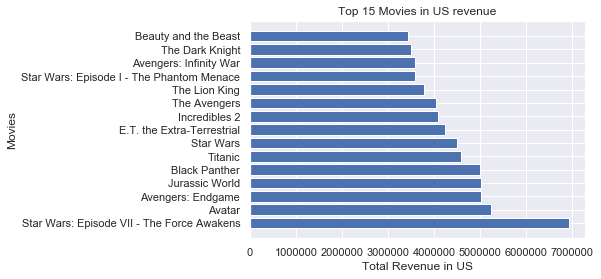

In [28]:
plt.barh(top15_usmovies['title'],top15_usmovies['revenue_usa'])
plt.ylabel("Movies")
plt.title('Top 15 Movies in US revenue')
plt.xlabel("Total Revenue in US")
plt.savefig("Images/top15 in us_revenue.png")
plt.show()

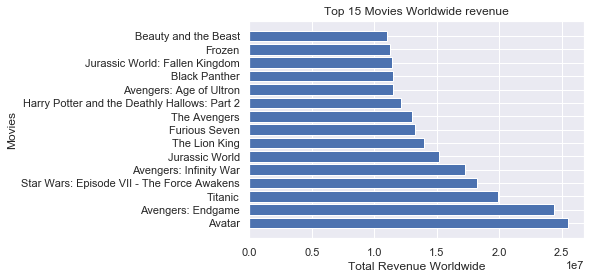

In [29]:
plt.barh(top15_wwmovies['title'],top15_wwmovies['revenue_worlwide'])
plt.ylabel("Movies")
plt.title('Top 15 Movies Worldwide revenue')
plt.xlabel("Total Revenue Worldwide")
plt.savefig("Images/top15 in ww_revenue.png")
plt.show()

# Missing top directors of those tops and ratings
## Number of movies

In [30]:
# Generate Summary table of directors
print(movies['year'].min())

director_summary = movies.groupby('director').agg({'revenue_usa':"mean",'revenue_worlwide':'mean','us_voters_rating':'mean','avg_vote':'mean','director':'count'}).sort_values(by='revenue_worlwide',ascending=False)

director_summary = director_summary.loc[director_summary['director']>1]
director_summary

1931


,revenue_usa,revenue_worlwide,us_voters_rating,avg_vote,director
director,,,,,
"Kyle Balda, Pierre Coffin",2.233350e+06,1.020099e+07,6.250000,6.350000,2
"Anthony Russo, Joe Russo",1.863340e+06,9.475804e+06,7.533333,7.416667,6
Joss Whedon,1.996261e+06,8.171628e+06,7.966667,7.700000,3
James Cameron,1.715897e+06,7.754444e+06,7.942857,7.900000,7
"Pierre Coffin, Chris Renaud",2.372897e+06,6.844400e+06,7.450000,7.450000,2
...,...,...,...,...,...
Steven Zaillian,-2.360073e+05,-2.285758e+05,6.700000,6.733333,3
Terry George,-2.887428e+05,-2.346196e+05,7.666667,6.900000,3
Andrey Konchalovskiy,-3.118769e+05,-2.574025e+05,6.033333,6.166667,3


The correlation between the number of movies directed and the average revenue in US is 0.11


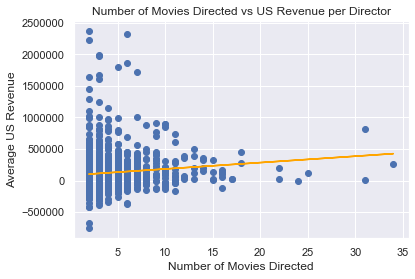

In [31]:
# Movies vs US revenue
plt.scatter(director_summary['director'],director_summary['revenue_usa'])

corr=round(st.pearsonr(director_summary['director'],director_summary['revenue_usa'])[0],2)
print(f"The correlation between the number of movies directed and the average revenue in US is {corr}")

model = st.linregress(director_summary['director'],director_summary['revenue_usa'])

y_values = director_summary['director']*model[0]+model[1]

plt.plot(director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average US Revenue')
plt.title('Number of Movies Directed vs US Revenue per Director')
plt.savefig("Images/movies vs us_revenue.png")
plt.show()

The correlation between the number of movies directed and the average revenue Worldwide is 0.15


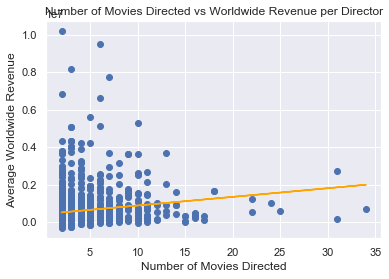

In [32]:
# Movies vs WW revenue
plt.scatter(director_summary['director'],director_summary['revenue_worlwide'])

corr=round(st.pearsonr(director_summary['director'],director_summary['revenue_worlwide'])[0],2)
print(f"The correlation between the number of movies directed and the average revenue Worldwide is {corr}")

model = st.linregress(director_summary['director'],director_summary['revenue_worlwide'])

y_values = director_summary['director']*model[0]+model[1]

plt.plot(director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average Worldwide Revenue')
plt.title('Number of Movies Directed vs Worldwide Revenue per Director')
plt.savefig("Images/movies vs ww_revenue.png")
plt.show()

The correlation between the number of movies directed and the average US Ratings is 0.13


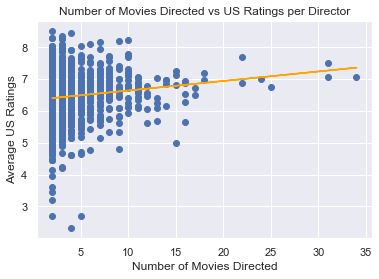

In [33]:
# Movies vs US ratings
plt.scatter(director_summary['director'],director_summary['us_voters_rating'])

corr=round(st.pearsonr(director_summary['director'],director_summary['us_voters_rating'])[0],2)
print(f"The correlation between the number of movies directed and the average US Ratings is {corr}")

model = st.linregress(director_summary['director'],director_summary['us_voters_rating'])

y_values = director_summary['director']*model[0]+model[1]

plt.plot(director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average US Ratings')
plt.title('Number of Movies Directed vs US Ratings per Director')
plt.savefig("Images/movies vs us_ratings.png")
plt.show()

The correlation between the number of movies directed and the average Worldwide Ratings is 0.14


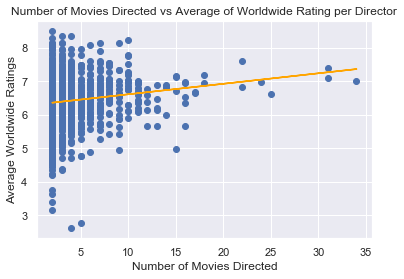

In [34]:
# Movies vs WW ratings
plt.scatter(director_summary['director'],director_summary['avg_vote'])

corr=round(st.pearsonr(director_summary['director'],director_summary['avg_vote'])[0],2)
print(f"The correlation between the number of movies directed and the average Worldwide Ratings is {corr}")

model = st.linregress(director_summary['director'],director_summary['avg_vote'])

y_values = director_summary['director']*model[0]+model[1]

plt.plot(director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average Worldwide Ratings')
plt.title('Number of Movies Directed vs Average of Worldwide Rating per Director')
plt.savefig("Images/movies vs ww_ratings.png")
plt.show()

## Last Decade

In [35]:
# Generate Summary table of directors in the last decade
print(recent_movies['year'].min())

recent_director_summary = recent_movies.groupby('director').agg({'revenue_usa':"mean",'revenue_worlwide':'mean','us_voters_rating':'mean','avg_vote':'mean','director':'count'}).sort_values(by='revenue_worlwide',ascending=False)

recent_director_summary = recent_director_summary.loc[recent_director_summary['director']>1]
recent_director_summary

2010


,revenue_usa,revenue_worlwide,us_voters_rating,avg_vote,director
director,,,,,
"Kyle Balda, Pierre Coffin",2233350.350,1.020099e+07,6.250000,6.350000,2
"Pierre Coffin, Chris Renaud",2372896.850,6.844400e+06,7.450000,7.450000,2
Andy Muschietti,1605122.710,3.937348e+06,6.866667,6.766667,3
Jake Kasdan,1311255.000,3.847897e+06,6.000000,5.866667,3
Todd Phillips,968405.072,3.797689e+06,6.780000,6.920000,5
...,...,...,...,...,...
Joel Schumacher,-198959.930,-1.391041e+05,5.400000,5.500000,2
David Cronenberg,-171928.515,-1.404904e+05,5.550000,5.600000,2
Joe Cornish,-270925.175,-1.701743e+05,6.700000,6.300000,2


The correlation between the number of movies directed and the average revenue in US is 0.13


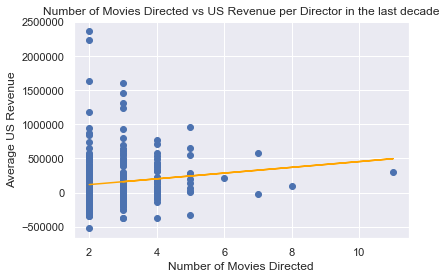

In [36]:
# Movies vs US revenue in last decade
plt.scatter(recent_director_summary['director'],recent_director_summary['revenue_usa'])

corr=round(st.pearsonr(recent_director_summary['director'],recent_director_summary['revenue_usa'])[0],2)
print(f"The correlation between the number of movies directed and the average revenue in US is {corr}")

model = st.linregress(recent_director_summary['director'],recent_director_summary['revenue_usa'])

y_values = recent_director_summary['director']*model[0]+model[1]

plt.plot(recent_director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average US Revenue')
plt.title('Number of Movies Directed vs US Revenue per Director in the last decade')
plt.savefig("Images/movies vs us_revenue in ld.png")
plt.show()

The correlation between the number of movies directed and the average revenue Worldwide is 0.1


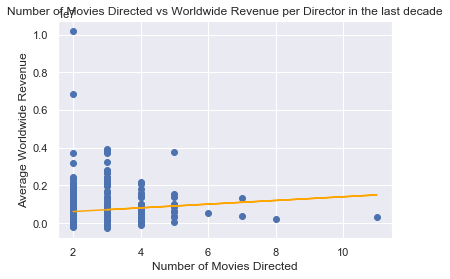

In [37]:
# Movies vs WW revenue in last decade
plt.scatter(recent_director_summary['director'],recent_director_summary['revenue_worlwide'])

corr=round(st.pearsonr(recent_director_summary['director'],recent_director_summary['revenue_worlwide'])[0],2)
print(f"The correlation between the number of movies directed and the average revenue Worldwide is {corr}")

model = st.linregress(recent_director_summary['director'],recent_director_summary['revenue_worlwide'])

y_values = recent_director_summary['director']*model[0]+model[1]

plt.plot(recent_director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average Worldwide Revenue')
plt.title('Number of Movies Directed vs Worldwide Revenue per Director in the last decade')
plt.savefig("Images/movies vs ww_revenue in ld.png")
plt.show()

The correlation between the number of movies directed and the average US Ratings is -0.01


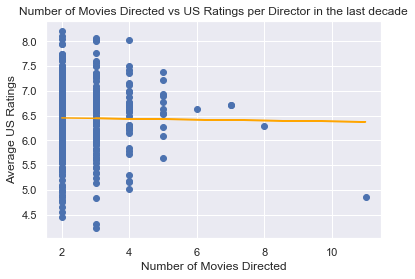

In [38]:
# Movies vs US ratings in the last decade
plt.scatter(recent_director_summary['director'],recent_director_summary['us_voters_rating'])

corr=round(st.pearsonr(recent_director_summary['director'],recent_director_summary['us_voters_rating'])[0],2)
print(f"The correlation between the number of movies directed and the average US Ratings is {corr}")

model = st.linregress(recent_director_summary['director'],recent_director_summary['us_voters_rating'])

y_values = recent_director_summary['director']*model[0]+model[1]

plt.plot(recent_director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average US Ratings')
plt.title('Number of Movies Directed vs US Ratings per Director in the last decade')
plt.savefig("Images/movies vs us_ratings in ld.png")
plt.show()

The correlation between the number of movies directed and the average Worldwide Ratings is -0.01


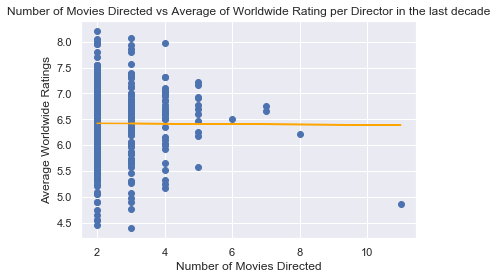

In [39]:
# Movies vs WW ratings in the last decade
plt.scatter(recent_director_summary['director'],recent_director_summary['avg_vote'])

corr=round(st.pearsonr(recent_director_summary['director'],recent_director_summary['avg_vote'])[0],2)
print(f"The correlation between the number of movies directed and the average Worldwide Ratings is {corr}")

model = st.linregress(recent_director_summary['director'],recent_director_summary['avg_vote'])

y_values = recent_director_summary['director']*model[0]+model[1]

plt.plot(recent_director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average Worldwide Ratings')
plt.title('Number of Movies Directed vs Average of Worldwide Rating per Director in the last decade')
plt.savefig("Images/movies vs ww_ratings in ld.png")
plt.show()

In [40]:
# Generate Summary table of directors
print(movies['year'].min())

director_summary = movies.groupby('director').agg({'revenue_usa':"mean",'revenue_worlwide':'mean','us_voters_rating':'mean','avg_vote':'mean','director':'count'}).sort_values(by='revenue_worlwide',ascending=False)

top_director_summary = director_summary.nlargest(15,['director'])
top_director_summary

1931


,revenue_usa,revenue_worlwide,us_voters_rating,avg_vote,director
director,,,,,
Clint Eastwood,255624.941176,6.720084e+05,7.061765,7.017647,34
Steven Spielberg,823099.720968,2.747624e+06,7.487097,7.396774,31
Woody Allen,7866.562258,1.818111e+05,7.054839,7.100000,31
Steven Soderbergh,124813.944000,5.954278e+05,6.748000,6.636000,25
Ridley Scott,-12106.143750,1.003077e+06,7.000000,6.991667,24
Ron Howard,204279.875909,1.234986e+06,6.859091,6.831818,22
Martin Scorsese,16570.577727,5.320824e+05,7.686364,7.613636,22
Robert Zemeckis,456780.228333,1.681409e+06,7.188889,7.200000,18
Tim Burton,282990.645556,1.635640e+06,6.983333,6.966667,18


In [41]:
topusrevenue_director_summary = director_summary.loc[director_summary['director']>1]
topusrevenue_director_summary = topusrevenue_director_summary.nlargest(15,['revenue_usa'])
topusrevenue_director_summary

,revenue_usa,revenue_worlwide,us_voters_rating,avg_vote,director
director,,,,,
"Pierre Coffin, Chris Renaud",2.372897e+06,6.844400e+06,7.450000,7.450000,2
George Lucas,2.313956e+06,5.106583e+06,7.216667,7.216667,6
"Kyle Balda, Pierre Coffin",2.233350e+06,1.020099e+07,6.250000,6.350000,2
Joss Whedon,1.996261e+06,8.171628e+06,7.966667,7.700000,3
Ryan Coogler,1.966762e+06,4.339889e+06,7.700000,7.466667,3
"Anthony Russo, Joe Russo",1.863340e+06,9.475804e+06,7.533333,7.416667,6
J.J. Abrams,1.798410e+06,5.588431e+06,7.700000,7.480000,5
James Cameron,1.715897e+06,7.754444e+06,7.942857,7.900000,7
Colin Trevorrow,1.666789e+06,5.062240e+06,6.866667,6.866667,3


In [43]:
topwwrevenue_director_summary = director_summary.loc[director_summary['director']>1]
topwwrevenue_director_summary = topwwrevenue_director_summary.nlargest(15,['revenue_worlwide'])
topwwrevenue_director_summary

,revenue_usa,revenue_worlwide,us_voters_rating,avg_vote,director
director,,,,,
"Kyle Balda, Pierre Coffin",2.233350e+06,1.020099e+07,6.250000,6.350000,2
"Anthony Russo, Joe Russo",1.863340e+06,9.475804e+06,7.533333,7.416667,6
Joss Whedon,1.996261e+06,8.171628e+06,7.966667,7.700000,3
James Cameron,1.715897e+06,7.754444e+06,7.942857,7.900000,7
"Pierre Coffin, Chris Renaud",2.372897e+06,6.844400e+06,7.450000,7.450000,2
David Yates,6.855078e+05,6.590555e+06,7.283333,7.216667,6
J.J. Abrams,1.798410e+06,5.588431e+06,7.700000,7.480000,5
Peter Jackson,8.906283e+05,5.284648e+06,7.760000,7.790000,10
George Lucas,2.313956e+06,5.106583e+06,7.216667,7.216667,6


In [44]:
topusratings_director_summary = director_summary.loc[director_summary['director']>1]
topusratings_director_summary = topusratings_director_summary.nlargest(15,['us_voters_rating'])
topusratings_director_summary

,revenue_usa,revenue_worlwide,us_voters_rating,avg_vote,director
director,,,,,
Charles Chaplin,-1.408621e+04,-1.261083e+04,8.500000,8.500000,2
Alfred Hitchcock,1.769904e+05,1.778618e+05,8.450000,8.350000,4
Sergio Leone,1.753333e+05,1.758958e+05,8.333333,8.366667,3
"Victor Fleming, George Cukor",1.094444e+06,2.108596e+06,8.300000,8.050000,2
Orson Welles,1.082186e+04,1.106164e+04,8.300000,8.150000,2
David Lean,5.174278e+05,5.194315e+05,8.300000,8.133333,3
Akira Kurosawa,-3.189147e+04,-3.174935e+04,8.266667,8.133333,3
Christopher Nolan,9.015952e+05,3.651896e+06,8.230000,8.250000,10
Quentin Tarantino,4.221104e+05,1.642625e+06,8.200000,8.144444,9


In [45]:
topwwratings_director_summary = director_summary.loc[director_summary['director']>1]
topwwratings_director_summary = topwwratings_director_summary.nlargest(15,['avg_vote'])
topwwratings_director_summary

,revenue_usa,revenue_worlwide,us_voters_rating,avg_vote,director
director,,,,,
Charles Chaplin,-1.408621e+04,-1.261083e+04,8.500000,8.500000,2
Sergio Leone,1.753333e+05,1.758958e+05,8.333333,8.366667,3
Alfred Hitchcock,1.769904e+05,1.778618e+05,8.450000,8.350000,4
Giuseppe Tornatore,-7.176775e+03,-5.937345e+03,8.050000,8.300000,2
Christopher Nolan,9.015952e+05,3.651896e+06,8.230000,8.250000,10
Thomas Vinterberg,-1.415234e+04,6.649240e+04,8.000000,8.150000,2
Orson Welles,1.082186e+04,1.106164e+04,8.300000,8.150000,2
Quentin Tarantino,4.221104e+05,1.642625e+06,8.200000,8.144444,9
Stanley Kubrick,1.474745e+05,3.129310e+05,8.171429,8.142857,7
